In [1]:
import os
from pathlib import Path

# Set working directory to Downloads
downloads_path = Path.home() / "Downloads"
os.chdir(downloads_path)

In [2]:
# Confirm it worked
print("Now in:", os.getcwd())

Now in: /Users/rohithr/Downloads


In [3]:
!pip install pandas

In [4]:
!pip install numpy

In [5]:
!pip install matplotlib

In [6]:
!pip install statsmodels

In [7]:
!pip install seaborn

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


In [12]:
import pandas as pd

# Load CSV
df = pd.read_csv("Tesla Stock Price 10 years.csv")

# Parse Date column
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Set Date as index
df.set_index('Date', inplace=True)

# Drop fully empty columns
df = df.dropna(axis=1, how='all')

# Preview the cleaned data
print(df.head())
# Check structure
print(df.info())
print(df.head())

             Price
Date              
2025-07-23  332.56
2025-07-22  332.11
2025-07-21  328.49
2025-07-18  329.65
2025-07-17  319.41
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2514 entries, 2025-07-23 to 2015-07-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2514 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB
None
             Price
Date              
2025-07-23  332.56
2025-07-22  332.11
2025-07-21  328.49
2025-07-18  329.65
2025-07-17  319.41


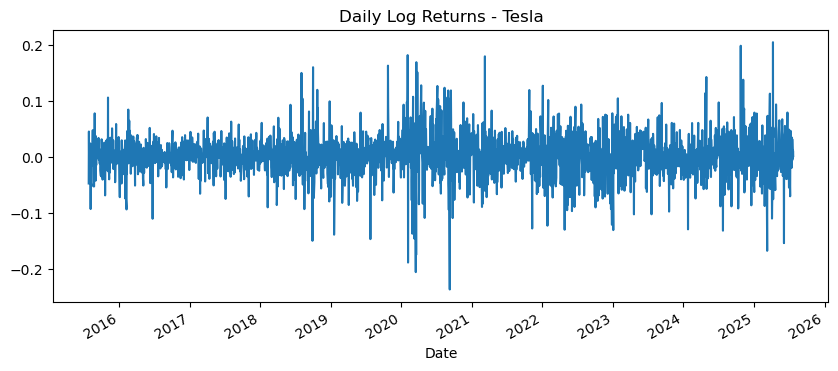

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Sort index (important if dates are reversed)
df.sort_index(inplace=True)

# Compute daily log returns
df['LogReturn'] = np.log(df['Price'] / df['Price'].shift(1))
returns = df['LogReturn'].dropna()

# Plot returns
returns.plot(title="Daily Log Returns - Tesla", figsize=(10, 4))
plt.show()

In [15]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.5/927.5 kB 5.5 MB/s eta 0:00:00


In [16]:
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

In [17]:
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

# ARCH LM test
test_stat, p_value, _, _ = het_arch(returns)

print(f"ARCH Test Statistic: {test_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ ARCH effects present (heteroskedasticity). Proceed with GARCH modeling.")
else:
    print("❌ No significant ARCH effects.")

ARCH Test Statistic: 125.3542
P-Value: 0.0000
✅ ARCH effects present (heteroskedasticity). Proceed with GARCH modeling.


In [18]:
# Fit GARCH(1,1) with normal errors
model = arch_model(returns, vol='GARCH', p=1, q=1, mean='Constant', dist='normal')
res = model.fit(disp='off')

print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              LogReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4857.92
Distribution:                  Normal   AIC:                          -9707.84
Method:            Maximum Likelihood   BIC:                          -9684.53
                                        No. Observations:                 2513
Date:                Thu, Jul 24 2025   Df Residuals:                     2512
Time:                        18:32:47   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.9321e-04  6.820e-04      1.456      0.145 

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001385. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


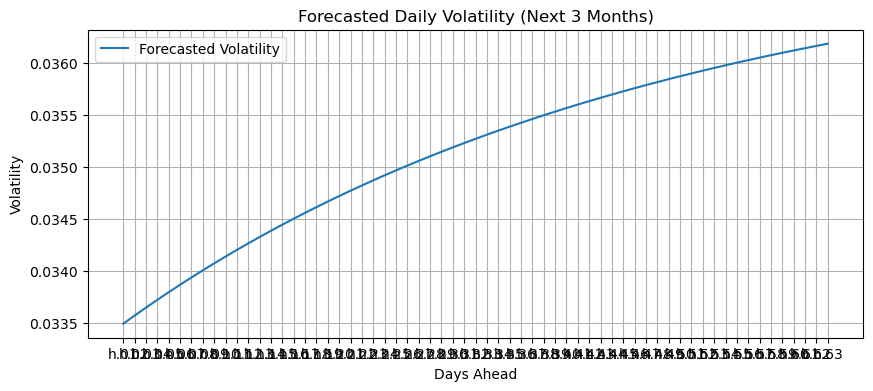

In [19]:
# Forecast 63 days ahead (approx. 3 months)
forecast_horizon = 63
forecast = res.forecast(horizon=forecast_horizon)

# Extract forecasted variance (convert to volatility)
variance_forecast = forecast.variance.iloc[-1]
vol_forecast = np.sqrt(variance_forecast)

# Plot forecasted volatility
plt.figure(figsize=(10, 4))
plt.plot(vol_forecast, label='Forecasted Volatility')
plt.title("Forecasted Daily Volatility (Next 3 Months)")
plt.xlabel("Days Ahead")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()